Loading Data

In [1]:
# labels=["LABEL_RRate", "LABEL_ABPm", "LABEL_SpO2", "LABEL_Heartrate"]

# for lab in labels:
#     count = (y_train[lab] >= 90).sum()
#     print(count)



# print(count)

In [20]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier,Ridge,RidgeCV
from sklearn.model_selection import cross_val_score ,GridSearchCV,RepeatedKFold,train_test_split
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.ensemble import HistGradientBoostingClassifier


In [21]:

X_train = pd.read_csv("train_features.csv")
#X_train = X_train.set_index("pid")

y_train = pd.read_csv("train_labels.csv")
#y_train = y_train.set_index("pid")

X_test = pd.read_csv("test_features.csv")
#X_test = X_test.set_index("pid")
#display(X_train)
#display(y_train)
#display(X_test)

In [22]:
##set average value for different measurements
X_train = X_train.drop("Time", axis=1)
X_train = X_train.groupby('pid',as_index=False,sort=False).mean()

X_test = X_test.drop("Time", axis=1)
X_test = X_test.groupby('pid',as_index=False,sort=False).mean()

#use knn to find appropriate value for missing entries
imputer = KNNImputer(n_neighbors=7)
X_train = imputer.fit_transform(X_train)
#use knn to find appropriate value for missing entries
#print(X_train.iloc[0])
imputer = KNNImputer(n_neighbors=7)
X_test = imputer.fit_transform(X_test)



# set dummy variable (-100) for missing values
#ind_train = X_train.isnull()
#X_train[ind_train] = -100

#ind_test = X_test.isnull()
#X_test[ind_test] = -100

In [23]:
#remove id column 


X_train = X_train[:,1:]
pid = X_test[:,0]
X_test = X_test[:,1:]

In [24]:
y_train["LABEL_Sepsis"]
pid = {"pid" : pid}
pid = pd.DataFrame(pid)

# Task 2A classification multiple variables

In [25]:
# use logistic regression for prediction
#X_train.to_numpy()
#y_train.to_numpy()
#X_test.to_numpy()
i=0

l2_regularization=np.array((1, 100 ,100, 1 ,200, 200 ,100 ,100, 1, 1))



labels=["LABEL_BaseExcess", "LABEL_Fibrinogen", "LABEL_AST", "LABEL_Alkalinephos", "LABEL_Bilirubin_total", "LABEL_Lactate", "LABEL_TroponinI", "LABEL_SaO2", "LABEL_Bilirubin_direct", "LABEL_EtCO2"]
predicted_labels = {}
for lab in labels:
    print(lab)
#     model = LogisticRegression(random_state=0).fit(X_train, y_train[lab])
#     modelsgd=SGDClassifier(random_state=0,loss="modified_huber").fit(X_train, y_train[lab])


    model=HistGradientBoostingClassifier(random_state=42,l2_regularization=l2_regularization[i],max_leaf_nodes=30).fit(X_train, y_train[lab])
#     param_grid = {
#         'learning_rate': (0.01, 0.1, 1, 10),
#         'max_leaf_nodes': (3, 10, 30),
#         'l2_regularization':(0.0 ,1.0 ,100.0, 200.0)
#     }
#     grid = GridSearchCV(model, param_grid=param_grid,
#                                      n_jobs=-1, cv=5, verbose = 3,scoring='roc_auc')
#     grid.fit(X_train, y_train[lab])

    
    
#     max_depth=[2, 8, 16]
#     n_estimators = [64, 128]
#     param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
#     model = RandomForestClassifier(random_state=20,n_estimators=64, max_depth=2).fit(X_train, y_train[lab])
#     grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5,verbose = 2)
#     grid_results = grid.fit(X_train, y_train["LABEL_Sepsis"])
#     print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))


#     print(grid.best_params_)
#     print(grid.best_estimator_)
    i=i+1
#   predicted_labels[lab] = np.around(model.predict_proba(X_test)[:,1], 5)
    predicted_labels[lab]= np.around(model.predict_proba(X_test)[:,1], 5)
# 



LABEL_BaseExcess
LABEL_Fibrinogen
LABEL_AST
LABEL_Alkalinephos
LABEL_Bilirubin_total
LABEL_Lactate
LABEL_TroponinI
LABEL_SaO2
LABEL_Bilirubin_direct
LABEL_EtCO2


In [ ]:
# labels=["LABEL_BaseExcess", "LABEL_Fibrinogen", "LABEL_AST", "LABEL_Alkalinephos", "LABEL_Bilirubin_total", "LABEL_Lactate", "LABEL_TroponinI", "LABEL_SaO2", "LABEL_Bilirubin_direct", "LABEL_EtCO2"]
# predicted_labels = {}
# i=0
# for lab in labels:
#     print(i)
#     i=i+1


# Task 2B classification 1 variable

In [26]:
#predict sepsis event
scaler = StandardScaler()

# X_scaled=scaler.transform(X_train)
# y_scaled=scaler.transform(y_train)




# max_depth=[2, 8, 16]
# n_estimators = [64, 128]
# param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
model = RandomForestClassifier(random_state=20,n_estimators=64, max_depth=2).fit(X_train, y_train["LABEL_Sepsis"])
# grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5,verbose = 2)
# grid_results = grid.fit(X_train, y_train["LABEL_Sepsis"])
# print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))


# param_grid = {"model__C": [ 1.0, 10.0, 100.0],
#               'model__gamma': [1, 0.1, 0.01, 0.001],
#               'model__coef0':[0.0 ,5.0 ,10.0 ,50.0],
#               'model__kernel': ['sigmoid','rbf']}
# model =  SVC(random_state=20, probability=True)
# pipe = Pipeline(steps=[("scaler", scaler), ("model", model)])
# print(pipe.get_params().keys())
# grid = GridSearchCV(pipe, param_grid, refit = True, verbose = 2,n_jobs=-1,cv=5).fit(X_train, y_train["LABEL_Sepsis"])


# model.fit(X_train, y_train["LABEL_Sepsis"])
# print(grid.best_params_)
# print(grid.best_estimator_)

# model = LogisticRegression(random_state=0).fit(X_train, y_train["LABEL_Sepsis"])
predicted_labels["LABEL_Sepsis"] = np.around(model.predict_proba(X_test)[:,1],5)#_proba

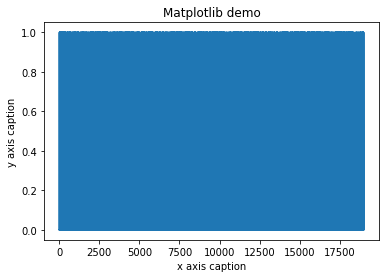

In [27]:
x = np.arange(1,11) 
y = 2 * x + 5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(y_train["LABEL_Sepsis"]) 
plt.show()



# Task 2C Regression multiple variables

mean  18.795959655719553
std  3.511241475344605
mean  82.51117094000381
std  12.745110346239075
mean  96.94731096288041
std  2.110956571268135
mean  84.11971626206534
std  14.718396461244058


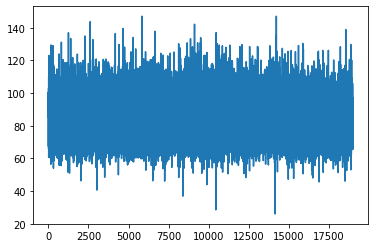

In [28]:

labels=["LABEL_RRate", "LABEL_ABPm", "LABEL_SpO2", "LABEL_Heartrate"]


for lab in labels:
    print("mean ",y_train[lab].mean())
    print("std " ,y_train[lab].std())
plt.plot(y_train[labels[1]] )


In [29]:
#predicted vital rates
# param_grid = [{'alpha': [0.1, 1 ,10 ,100, 200 ,500]} ]
    
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X_trainsc = sc_X.fit_transform(X_train)
# y_trainsc = sc_y.fit_transform(y_train[labels])

# param_grid = {"model__C": [ 1.0, 10.0, 100.0],
#               'model__gamma': [1, 0.01, 0.001],
#               'model__coef0':[0.0  ,10.0 ,50.0],
#               'model__kernel': ['sigmoid','rbf']}
# pipe = Pipeline(steps=[("scaler", scaler), ("model", model)])
# print(pipe.get_params().keys())




for lab in labels:
        model = Ridge(random_state=88,alpha=500).fit(X_train, y_train[lab])
#         grid = GridSearchCV(model, param_grid, refit = True, verbose = 3,n_jobs=-1).fit(X_train, y_train[lab])
# model=SVR(random_state=20, probability=True)
#         grid = GridSearchCV(pipe, param_grid, refit = True, verbose = 2,n_jobs=-1,cv=5).fit(X_train, y_train["LABEL_Sepsis"])
#         print(grid.best_params_) 

#         scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=10 ) # use negative RMS as metric
#         score_avgd=abs(np.mean(scores))
#         print('Mean MSE: %f (%f)' % (score_avgd, np.std(scores)))  

        predicted_labels[lab] = np.around(model.predict(X_test),1)



# print(predicted_labels)


In [30]:
#export data frame
predicted_labels=pd.DataFrame(predicted_labels)
print(predicted_labels.shape)
predicted_labels = pd.concat([pid, predicted_labels], axis=1)
# predicted_labels.to_csv("prediction.csv", sep=",", index=False)
# predicted_labels.to_csv('prediction.zip',sep=",", index=False, compression='zip')


(12664, 15)


In [31]:
predicted_labels.to_csv('prediction.zip', index=False, float_format='%.3f', compression='zip')



In [32]:
print(y_train.shape)



(18995, 16)


# Evaluate

In [33]:
VITALS = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']
TESTS = ['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total',
         'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2',
         'LABEL_Bilirubin_direct', 'LABEL_EtCO2']


def get_score(df_true, df_submission):
    df_submission = df_submission.sort_values('pid')
    df_true = df_true.sort_values('pid')
    task1 = np.mean([metrics.roc_auc_score(df_true[entry], df_submission[entry]) for entry in TESTS])
    task2 = metrics.roc_auc_score(df_true['LABEL_Sepsis'], df_submission['LABEL_Sepsis'])
    task3 = np.mean([0.5 + 0.5 * np.maximum(0, metrics.r2_score(df_true[entry], df_submission[entry])) for entry in VITALS])
    score = np.mean([task1, task2, task3])
    print(task1, task2, task3)
    return score


In [19]:
print(predicted_labels)

           pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  \
0          0.0           0.59862           0.16088    0.60498   
1      10001.0           0.12497           0.08057    0.41767   
2      10003.0           0.02310           0.09551    0.27466   
3      10004.0           0.05420           0.05067    0.25194   
4      10005.0           0.03999           0.02109    0.20495   
...        ...               ...               ...        ...   
12659   9989.0           0.06410           0.03748    0.22246   
12660   9991.0           0.26569           0.11669    0.17215   
12661   9992.0           0.42697           0.01994    0.16329   
12662   9994.0           0.60028           0.11642    0.39549   
12663   9997.0           0.76563           0.02634    0.16650   

       LABEL_Alkalinephos  LABEL_Bilirubin_total  LABEL_Lactate  \
0                 0.62502                0.55315        0.44354   
1                 0.40004                0.40296        0.16986   
2                 